In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

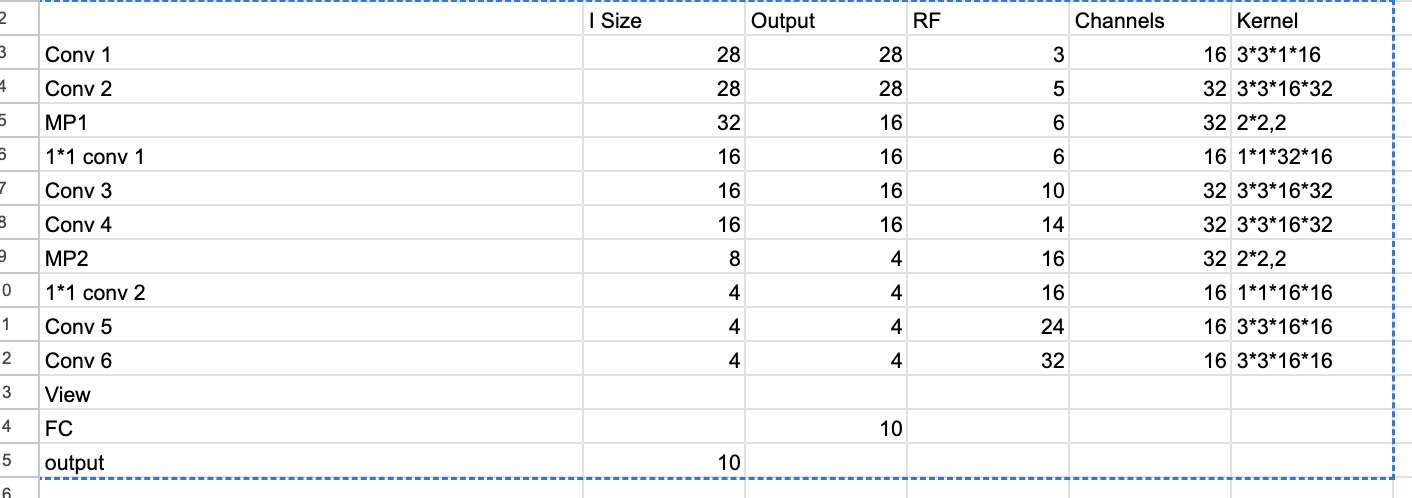

In [2]:
nn.Conv1d?

In [3]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, padding=1) #input -? OUtput? RF
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv1d_1 =  nn.Conv2d(32,8, 1)
        self.conv3 = nn.Conv2d(8, 16, 3, padding=1)
        self.conv4 = nn.Conv2d(16, 32, 3, padding=1)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.conv1d_2 =  nn.Conv2d(32,8,1,stride=1)
        self.conv5 = nn.Conv2d(8, 16, 3)
        self.conv6 = nn.Conv2d(16, 32, 3)
        self.conv1d_3 =  nn.Conv2d(32,8,1,stride=1)
        self.fc = nn.Linear(72,10)


    def forward(self, x):
        x = self.conv1d_1(self.pool1(F.relu(self.conv2(F.relu(self.conv1(x))))))
        #return x
        x = self.conv1d_2(self.pool2(F.relu(self.conv4(F.relu(self.conv3(x))))))
        x = F.relu(self.conv6(F.relu(self.conv5(x))))
        x = F.relu(self.conv1d_3(x))
        x = x.view(x.size(0), -1)
        return F.log_softmax(F.relu(self.fc(x)))

In [43]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, padding=1) #input -? OUtput? RF
        #nn.BatchNorm2d(16)
        self.bn1 = nn.BatchNorm2d(16)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.bn2 = nn.BatchNorm2d(32)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv1d_1 =  nn.Conv2d(32,8, 1)
        self.conv3 = nn.Conv2d(8, 16, 3, padding=1)
        self.bn3 = nn.BatchNorm2d(16)
        self.conv4 = nn.Conv2d(16, 32, 3, padding=1)
        self.bn4 = nn.BatchNorm2d(32)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.conv1d_2 =  nn.Conv2d(32,8,1,stride=1)
        self.conv5 = nn.Conv2d(8, 16, 3)
        self.bn5 = nn.BatchNorm2d(16)
        self.conv6 = nn.Conv2d(16, 32, 3)
        self.bn6 = nn.BatchNorm2d(32)
        self.conv1d_3 =  nn.Conv2d(32,8,1,stride=1)
        self.bn7 = nn.BatchNorm2d(8)
        self.fc = nn.Linear(72,10)
        self.dropout = nn.Dropout(0.1)


    def forward(self, x):
        x = self.conv1d_1(self.pool1(F.relu(self.bn2(self.conv2(F.relu(self.bn1(self.conv1(x))))))))
        #return x
        # x = nn.Dropout(0.1)(x)
        x = self.dropout(x)
        x = self.conv1d_2(self.pool2(F.relu(self.bn4(self.conv4(F.relu(self.bn3(self.conv3(x))))))))
        x = F.relu(self.bn6(self.conv6(F.relu(self.bn5(self.conv5(x))))))
        x = F.relu(self.bn7(self.conv1d_3(x)))
        x = x.view(x.size(0), -1)
        return F.log_softmax(F.relu(self.fc(x)))

In [44]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 28, 28]             160
       BatchNorm2d-2           [-1, 16, 28, 28]              32
            Conv2d-3           [-1, 32, 28, 28]           4,640
       BatchNorm2d-4           [-1, 32, 28, 28]              64
         MaxPool2d-5           [-1, 32, 14, 14]               0
            Conv2d-6            [-1, 8, 14, 14]             264
           Dropout-7            [-1, 8, 14, 14]               0
            Conv2d-8           [-1, 16, 14, 14]           1,168
       BatchNorm2d-9           [-1, 16, 14, 14]              32
           Conv2d-10           [-1, 32, 14, 14]           4,640
      BatchNorm2d-11           [-1, 32, 14, 14]              64
        MaxPool2d-12             [-1, 32, 7, 7]               0
           Conv2d-13              [-1, 8, 7, 7]             264
           Conv2d-14             [-1, 1

<ipython-input-43-fe7d5af338ff>:36: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(F.relu(self.fc(x)))


In [46]:


torch.manual_seed(1)
batch_size = 64

kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
# train_loader = torch.utils.data.DataLoader(
#     datasets.MNIST('../data', train=True, download=True,
#                     transform=transforms.Compose([
#                         transforms.ToTensor(),
#                         transforms.Normalize((0.1307,), (0.3081,))
#                     ])),
#     batch_size=batch_size, shuffle=True, **kwargs)
# test_loader = torch.utils.data.DataLoader(
#     datasets.MNIST('../data', train=False, transform=transforms.Compose([
#                         transforms.ToTensor(),
#                         transforms.Normalize((0.1307,), (0.3081,))
#                     ])),
#     batch_size=batch_size, shuffle=True, **kwargs)


from torchvision import transforms

# Update the data loaders to include data augmentation
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                    transform=transforms.Compose([
                        transforms.RandomRotation(10),  # Rotate by up to 10 degrees
                        transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),  # Random translation
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)

test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)


In [47]:
from tqdm import tqdm
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    pbar = tqdm(train_loader)
    for batch_idx, (data, target) in enumerate(pbar):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        pbar.set_description(desc= f'loss={loss.item()} batch_id={batch_idx}')


def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.1f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [48]:

model = Net().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(1, 20):
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

  0%|          | 0/469 [00:00<?, ?it/s]<ipython-input-43-fe7d5af338ff>:36: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(F.relu(self.fc(x)))
loss=0.20113474130630493 batch_id=468: 100%|██████████| 469/469 [00:29<00:00, 15.64it/s]



Test set: Average loss: 0.0538, Accuracy: 9871/10000 (98.7%)



loss=0.14662954211235046 batch_id=468: 100%|██████████| 469/469 [00:31<00:00, 14.72it/s]



Test set: Average loss: 0.0397, Accuracy: 9870/10000 (98.7%)



loss=0.10597454756498337 batch_id=468: 100%|██████████| 469/469 [00:29<00:00, 15.78it/s]



Test set: Average loss: 0.0316, Accuracy: 9910/10000 (99.1%)



loss=0.14412657916545868 batch_id=468: 100%|██████████| 469/469 [00:29<00:00, 15.82it/s]



Test set: Average loss: 0.0299, Accuracy: 9916/10000 (99.2%)



loss=0.0729445368051529 batch_id=468: 100%|██████████| 469/469 [00:30<00:00, 15.38it/s]



Test set: Average loss: 0.0229, Accuracy: 9928/10000 (99.3%)



loss=0.003632587380707264 batch_id=468: 100%|██████████| 469/469 [00:29<00:00, 16.00it/s]



Test set: Average loss: 0.0267, Accuracy: 9927/10000 (99.3%)



loss=0.08136429637670517 batch_id=468: 100%|██████████| 469/469 [00:30<00:00, 15.42it/s]



Test set: Average loss: 0.0310, Accuracy: 9913/10000 (99.1%)



loss=0.02216625027358532 batch_id=468: 100%|██████████| 469/469 [00:29<00:00, 16.01it/s]



Test set: Average loss: 0.0208, Accuracy: 9925/10000 (99.2%)



loss=0.1248861625790596 batch_id=468: 100%|██████████| 469/469 [00:31<00:00, 15.08it/s]



Test set: Average loss: 0.0204, Accuracy: 9935/10000 (99.3%)



loss=0.03354756906628609 batch_id=468: 100%|██████████| 469/469 [00:29<00:00, 15.89it/s]



Test set: Average loss: 0.0214, Accuracy: 9931/10000 (99.3%)



loss=0.01820302940905094 batch_id=468: 100%|██████████| 469/469 [00:30<00:00, 15.36it/s]



Test set: Average loss: 0.0190, Accuracy: 9945/10000 (99.5%)



loss=0.03332187235355377 batch_id=468: 100%|██████████| 469/469 [00:29<00:00, 15.75it/s]



Test set: Average loss: 0.0192, Accuracy: 9939/10000 (99.4%)



loss=0.050290632992982864 batch_id=468: 100%|██████████| 469/469 [00:29<00:00, 15.74it/s]



Test set: Average loss: 0.0309, Accuracy: 9901/10000 (99.0%)



loss=0.006051718723028898 batch_id=468: 100%|██████████| 469/469 [00:30<00:00, 15.44it/s]



Test set: Average loss: 0.0179, Accuracy: 9940/10000 (99.4%)



loss=0.009286673739552498 batch_id=468: 100%|██████████| 469/469 [00:29<00:00, 15.85it/s]



Test set: Average loss: 0.0217, Accuracy: 9932/10000 (99.3%)



loss=0.0931750237941742 batch_id=468: 100%|██████████| 469/469 [00:30<00:00, 15.62it/s]



Test set: Average loss: 0.0208, Accuracy: 9933/10000 (99.3%)



loss=0.026775948703289032 batch_id=468: 100%|██████████| 469/469 [00:29<00:00, 15.66it/s]



Test set: Average loss: 0.0172, Accuracy: 9941/10000 (99.4%)



loss=0.05636361613869667 batch_id=468: 100%|██████████| 469/469 [00:30<00:00, 15.14it/s]



Test set: Average loss: 0.0165, Accuracy: 9949/10000 (99.5%)



loss=0.05541451275348663 batch_id=468: 100%|██████████| 469/469 [00:29<00:00, 15.85it/s]



Test set: Average loss: 0.0152, Accuracy: 9954/10000 (99.5%)

